In [ ]:
import numpy as np
import pandas as pd



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
train_data_path = 'drive/My Drive/FYP dataset/emnist-balanced-train.csv'
test_data_path = 'drive/My Drive/FYP dataset/emnist-balanced-test.csv'

#C:/Users/USER/Google Drive/Desktop/FYP/Kaggledataset

In [ ]:
train_data = pd.read_csv(train_data_path, header = None)

FileNotFoundError: ignored

In [ ]:
train_data.head(10)

In [ ]:
# The classes of this balanced dataset are as follows. Index into it based on class label
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [ ]:
class_mapping[20]

'K'

In [ ]:
train_data.shape

NameError: ignored

In [ ]:
num_classes = len(train_data[0].unique())
row_num = 8

plt.imshow(train_data.values[row_num, 1:].reshape([28,28]), cmap = 'Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num, 1:].reshape(28,28), axes= [1,0])
plt.imshow(img_flip, cmap = 'Greys_r')
plt.show()

In [ ]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

In [ ]:
show_img(train_data, 149)

NameError: ignored

In [ ]:

num_classes = 47 
img_size = 28

def img_label_load(data_path, num_classes=None):
    data = pd.read_csv(data_path, header=None)
    data_rows = len(data)
    if not num_classes:
        num_classes = len(data[0].unique())
    
    # this assumes square imgs. Should be 28x28
    img_size = int(np.sqrt(len(data.iloc[0][1:])))
    
    # Images need to be transposed. This line also does the reshaping needed.
    imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays
    
    labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors
    
    return imgs/255., labels

In [ ]:
import tensorflow as tf
import os


In [ ]:
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = keras.models.Sequential()

# C1 Convolutional Layer
model.add(keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), activation='relu', input_shape=(img_size,img_size,1)))




# S2 Pooling Layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Dropout(0.5))
model.add(keras.layers.Flatten())

# FC6 Fully Connected Layer
#model.add(keras.layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
#model.add(keras.layers.Dense(num_classes, activation = 'softmax'))


print('Shape after CNN :', model.output_shape)

model.add(keras.layers.Dense(3000, activation = 'relu'))
#model.add(keras.layers.Dense(300, activation = 'sigmoid'))
#model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation = 'softmax'))




model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

TypeError: ignored

In [ ]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 25, 25, 64]
[None, 24, 24, 64]
[None, 22, 22, 128]
[None, 20, 20, 128]
[None, 10, 10, 128]
[None, 8, 8, 256]
[None, 6, 6, 256]
[None, 6, 6, 256]
[None, 9216]
[None, 3000]
[None, 3000]
[None, 47]


In [ ]:
X, y = img_label_load(train_data_path)
print(X.shape)

(112800, 28, 28, 1)


In [ ]:
import tensorflow as tf
tf.__version__


'2.2.0'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint



In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
## consider using this for more variety
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

# if already ran this above, no need to do it again
# X, y = img_label_load(train_data_path)
# print("X.shape: ", X.shape)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
"""history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=10, # can change epochs to 10
                              validation_data=validation_data_generator)"""
my_callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]



#model.fit(dataset, epochs=10, callbacks=my_callbacks)

history = model.fit(training_data_generator, epochs=10, steps_per_epoch=500, validation_steps=600, validation_data=validation_data_generator, callbacks=my_callbacks)

#model.fit(train_images, y_train, validation_data=(test_images, y_test), epochs=8, batch_size=30, verbose=2)

Epoch 1/10
497/500 [============================>.] - ETA: 0s - loss: 1.6048 - accuracy: 0.5370
Epoch 00001: val_accuracy improved from -inf to 0.76594, saving model to best_model.h5
500/500 [==============================] - 9s 17ms/step - loss: 1.6005 - accuracy: 0.5378 - val_loss: 0.7515 - val_accuracy: 0.7659
Epoch 2/10
497/500 [============================>.] - ETA: 0s - loss: 0.7473 - accuracy: 0.7575
Epoch 00002: val_accuracy improved from 0.76594 to 0.79901, saving model to best_model.h5
500/500 [==============================] - 8s 17ms/step - loss: 0.7467 - accuracy: 0.7579 - val_loss: 0.5807 - val_accuracy: 0.7990
Epoch 3/10
498/500 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.7909
Epoch 00003: val_accuracy did not improve from 0.79901
500/500 [==============================] - 7s 15ms/step - loss: 0.6210 - accuracy: 0.7907 - val_loss: 0.6041 - val_accuracy: 0.7984
Epoch 4/10
499/500 [============================>.] - ETA: 0s - loss: 0.5561 - accur

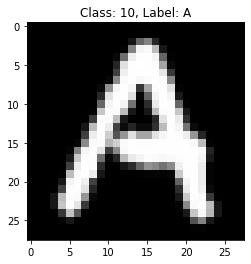

In [ ]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data, 140)

In [ ]:

X_test, y_test = img_label_load(test_data_path) # loads images and orients for model

In [ ]:
def run_prediction(idx):
    result = np.argmax(model.predict(X_test[idx:idx+1]))
    print('Prediction: ', result, ', Char: ', class_mapping[result])
    print('Label: ', test_data.values[idx,0])
    show_img(test_data, idx)

Prediction:  28 , Char:  S
Label:  28
Prediction:  39 , Char:  e
Label:  39
Prediction:  1 , Char:  1
Label:  1
Prediction:  28 , Char:  S
Label:  28
Prediction:  21 , Char:  L
Label:  21
Prediction:  12 , Char:  C
Label:  12
Prediction:  39 , Char:  e
Label:  39
Prediction:  44 , Char:  q
Label:  44
Prediction:  14 , Char:  E
Label:  14


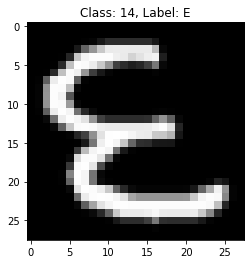

In [ ]:
import random

for _ in range(1,10):
    idx = random.randint(0, 47-1)
    run_prediction(idx)

38

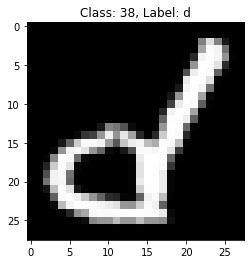

In [ ]:
show_img(test_data, 127)
np.argmax(y_test[127])


In [ ]:
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('./model.h5')

model.save('./full_model.h5')

    


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


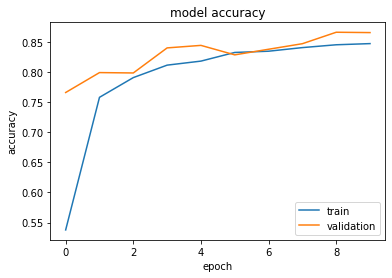

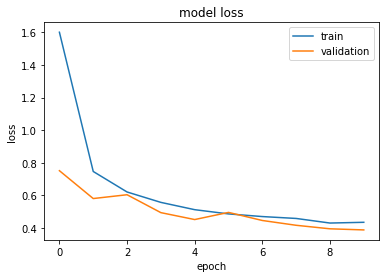

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
keras.__version__

'2.3.0-tf'

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
import os




from keras import backend as K
K.common.set_image_dim_ordering('th')

letter_count=  dict([('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5), ('6', 6), ('7', 7), ('8', 8), ('9', 9), ('A', 10), ('B', 11), ('C', 12), ('D', 13), ('E', 14), ('F', 15), ('G', 16), ('H', 17), ('I', 18), ('J', 19), ('K', 20), ('L', 21), ('M', 22), ('N', 23), ('O', 24), ('P', 25), ('Q', 26), ('R', 27), ('S', 28), ('T', 29), ('U', 30), ('V', 31), ('W', 32), ('X', 33), ('Y', 34), ('Z', 35), ('a', 36), ('b', 37), ('d', 38), ('e', 39), ('f', 40), ('g', 41), ('h', 42), ('n', 43), ('q', 44), ('r', 45), ('t', 46)])


x=[]
res=[]
fname=[]
folder='resized_images'
#folder = 'C:/Users/USER/Google Drive/Desktop/FYP/Program/test'
dirFiles=os.listdir(folder)
dirFiles = sorted(dirFiles,key=lambda x: int(os.path.splitext(x)[0]))
for filename in dirFiles:
    imt = cv2.imread(os.path.join(folder,filename))

    imt = cv2.blur(imt,(6,6))
    gray = cv2.cvtColor(imt,cv2.COLOR_BGR2GRAY)
    ret, imt = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)

    img = ~imt


    #plt.imshow(crop_img)
    if imt is not None:
        imt = imt.reshape((28, 28, 1))
    
#        plt.imshow(imt)
#        plt.show()
        imt=imt/255
        x.append(imt)
        #imt = ~imt
        fname.append(filename)
       
x=np.array(x);    

#np.resize(img, (-1, <image shape>))



imt = tf.cast(imt, tf.float32)

print("File loaded and reshaped. The new shape is ", imt.shape)
print("Start predicting...")
#predictions = loaded_model.predict(img)


predictions = loaded_model.predict(x)
classes = np.argmax(predictions, axis=1)   

for i in range(len(classes)):
            imt = cv2.imread(os.path.join(folder,dirFiles[i]))
            plt.imshow(imt, cmap='gray')
            plt.show()
            print([k for k,v in letter_count.items() if v == classes[i]])
            


               
            


    
#print('Prediction: ', result, ', Char: ', class_mapping[result])


#classes = np.argmax(predictions, axis=1)

#classes = pd.Series(classes,name="Label")
#classes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


File loaded and reshaped. The new shape is  (1, 28, 28, 1)
Start predicting...
Prediction:  13 , Char:  D


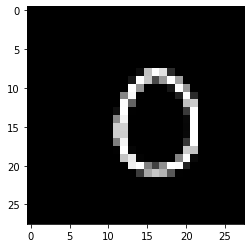

In [ ]:
#img = cv2.imread('C:/Users/USER/Google Drive/Desktop/FYP/Program/test image/Z.png')
img = cv2.imread('words/8.PNG')
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img =~img 
plt.imshow(img, cmap='gray')


img = img.reshape((-1, 28, 28, 1))

img = tf.cast(img, tf.float32)
print("File loaded and reshaped. The new shape is ", img.shape)
print("Start predicting...")
#predictions = loaded_model.predict(img)

class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

result = np.argmax(loaded_model.predict(img))

print('Prediction: ', result, ', Char: ', class_mapping[result])


#classes = np.argmax(predictions, axis=1)

#classes = pd.Series(classes,name="Label")
#classes

In [ ]:
|